In [1]:
import os

from tensorflow.keras import layers
from tensorflow.keras import Model

In [5]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

local_weights_file = 'inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(input_shape = (150, 150, 3), 
                                include_top = False, 
                                weights = None)

pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
    layer.trainable = False

#pre_trained_model.summary()

last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 768)


In [18]:
from tensorflow.keras.optimizers import RMSprop

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense  (1, activation='sigmoid')(x)           

model = Model( pre_trained_model.input, x) 

model.compile(optimizer = RMSprop(learning_rate=0.0001), 
              loss = 'binary_crossentropy', 
              metrics = 'accuracy')

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import zipfile
# Define our example directories and files
base_dir = 'cats_and_dogs_filtered'

train_dir = os.path.join( base_dir, 'train')
validation_dir = os.path.join( base_dir, 'validation')


train_cats_dir = os.path.join(train_dir, 'cats') # Directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs') # Directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats') # Directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')# Directory with our validation dog pictures

train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)

# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator( rescale = 1.0/255. )

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 20,
                                                    class_mode = 'binary', 
                                                    target_size = (150, 150))     

# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  test_datagen.flow_from_directory( validation_dir,
                                                          batch_size  = 20,
                                                          class_mode  = 'binary', 
                                                          target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [17]:
history = model.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 100,
            epochs = 20,
            validation_steps = 50,
            verbose = 2)

Epoch 1/20
100/100 - 9s - loss: 0.3279 - accuracy: 0.8785 - val_loss: 0.1087 - val_accuracy: 0.9620 - 9s/epoch - 94ms/step
Epoch 2/20
100/100 - 7s - loss: 0.2181 - accuracy: 0.9170 - val_loss: 0.1013 - val_accuracy: 0.9620 - 7s/epoch - 69ms/step
Epoch 3/20
100/100 - 7s - loss: 0.2055 - accuracy: 0.9305 - val_loss: 0.0894 - val_accuracy: 0.9680 - 7s/epoch - 69ms/step
Epoch 4/20
100/100 - 7s - loss: 0.1875 - accuracy: 0.9320 - val_loss: 0.0982 - val_accuracy: 0.9650 - 7s/epoch - 69ms/step
Epoch 5/20
100/100 - 7s - loss: 0.1750 - accuracy: 0.9390 - val_loss: 0.1046 - val_accuracy: 0.9650 - 7s/epoch - 69ms/step
Epoch 6/20
100/100 - 7s - loss: 0.1875 - accuracy: 0.9310 - val_loss: 0.1073 - val_accuracy: 0.9670 - 7s/epoch - 69ms/step
Epoch 7/20
100/100 - 7s - loss: 0.1716 - accuracy: 0.9385 - val_loss: 0.1007 - val_accuracy: 0.9650 - 7s/epoch - 69ms/step
Epoch 8/20
100/100 - 7s - loss: 0.1686 - accuracy: 0.9455 - val_loss: 0.0948 - val_accuracy: 0.9690 - 7s/epoch - 69ms/step
Epoch 9/20
100/1

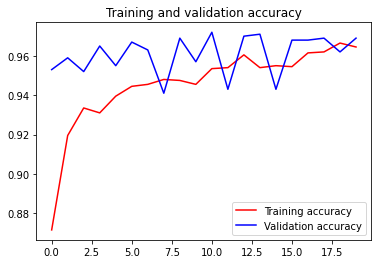

<Figure size 432x288 with 0 Axes>

In [14]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()